## Importing Libraries

In [1]:
%%time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time



CPU times: total: 1.11 s
Wall time: 1.35 s


## Importing data

In [2]:
%%time
file_path = 'data/fraud_data.csv'
data = pd.read_csv(file_path)
data.head()

CPU times: total: 0 ns
Wall time: 8.83 ms


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Making a copy of the data

In [3]:
%%time
df = data.copy()
df.head()

CPU times: total: 0 ns
Wall time: 0 ns


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA and Data Preprocessing

In [4]:
%%time
print("The dimension of the DataFrame is,")
df.shape

The dimension of the DataFrame is,
CPU times: total: 0 ns
Wall time: 0 ns


(600, 6)

In [5]:
%%time
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB
CPU times: total: 15.6 ms
Wall time: 5 ms


In [6]:
%%time
df.describe()

CPU times: total: 0 ns
Wall time: 4 ms


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
%%time
df.select_dtypes(include='number').corr()

CPU times: total: 0 ns
Wall time: 971 µs


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
%%time
print("The skewness of the dataset is as follows - ")
print(df.select_dtypes(include='number').skew())

The skewness of the dataset is as follows - 
Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64
CPU times: total: 0 ns
Wall time: 2 ms


In [9]:
print("Checking for null values.")
df.isnull().sum()

Checking for null values.


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
%%time
## Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

CPU times: total: 0 ns
Wall time: 1 ms


0

In [11]:
%%time
# Show only the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Undergrad, Marital.Status, Taxable.Income, City.Population, Work.Experience, Urban]
Index: []
CPU times: total: 0 ns
Wall time: 998 µs


In [12]:
### There is no duplicated rows in the dataset.

### Creating a new column Measure to categorise them as Risky or Good

In [13]:
## Cretaing column to identify 'Risky' and 'Good' status on the basis of Taxable income
df['Measure'] = df['Taxable.Income'].apply(lambda x : 'Risky' if x <= 30000 else  'Good')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Measure
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


## Vizualisation of Data

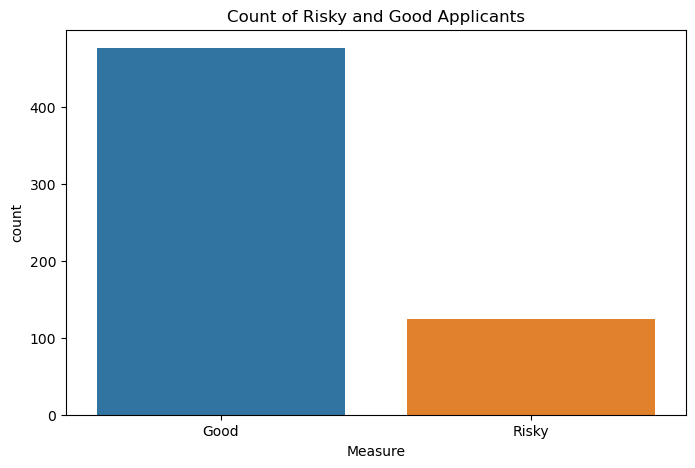

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Measure', data=df)
plt.title('Count of Risky and Good Applicants')
plt.savefig("Count of Risky and Good Applicants.png")
plt.show()

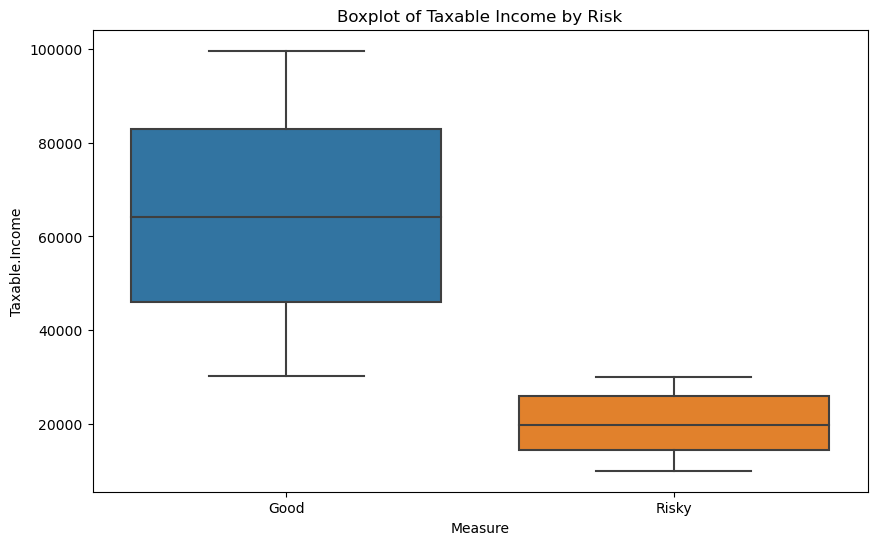

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Measure', y='Taxable.Income', data=df)
plt.title('Boxplot of Taxable Income by Risk')
plt.savefig("Boxplot of Taxable Income by Risk.png")
plt.show()

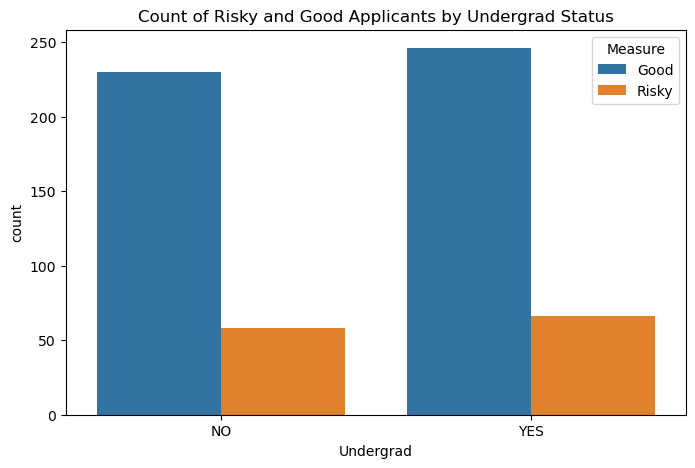

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Undergrad', hue='Measure', data=df)
plt.title('Count of Risky and Good Applicants by Undergrad Status')
plt.savefig("Count of Risky and Good Applicants by Undergrad Status.png")
plt.show()

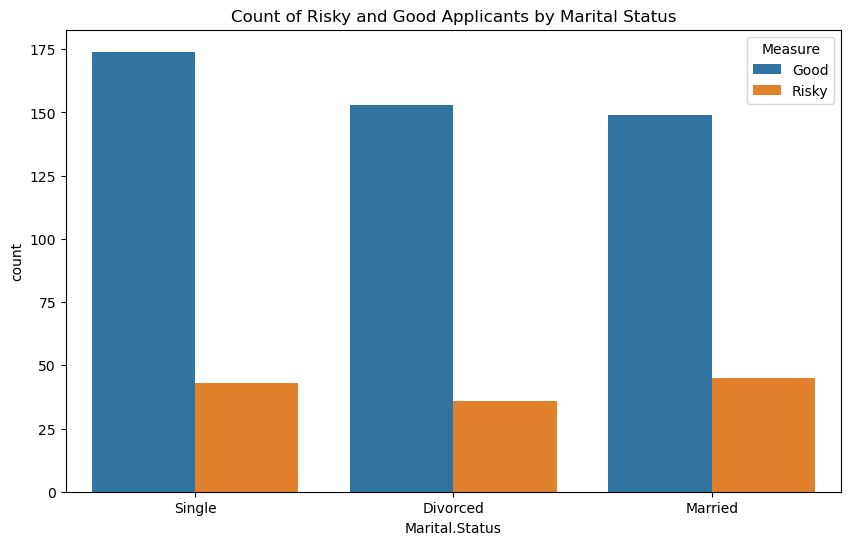

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital.Status', hue='Measure', data=df)
plt.title('Count of Risky and Good Applicants by Marital Status')
plt.savefig("Count of Risky and Good Applicants by Marital Status.png")
plt.show()

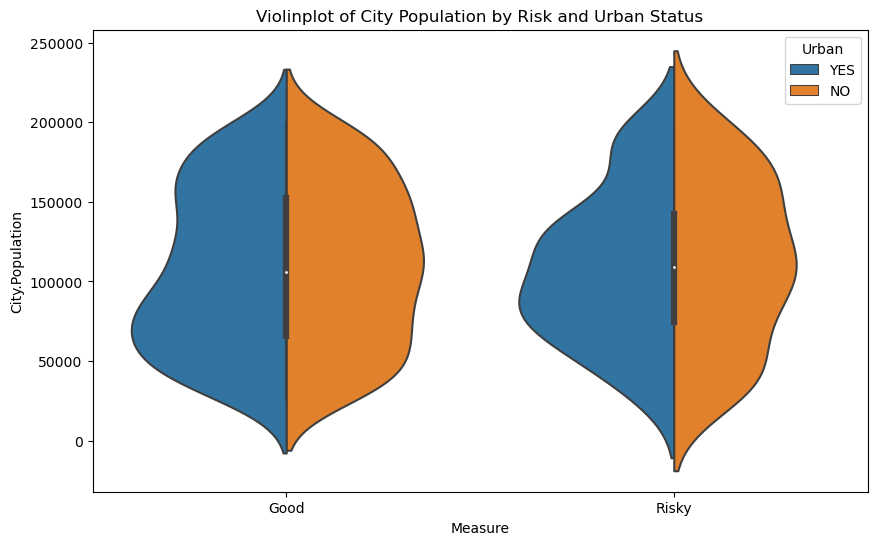

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Measure', y='City.Population', data=df, hue='Urban', split=True)
plt.title('Violinplot of City Population by Risk and Urban Status')
plt.savefig("Violinplot of City Population by Risk and Urban Status.png")
plt.show()

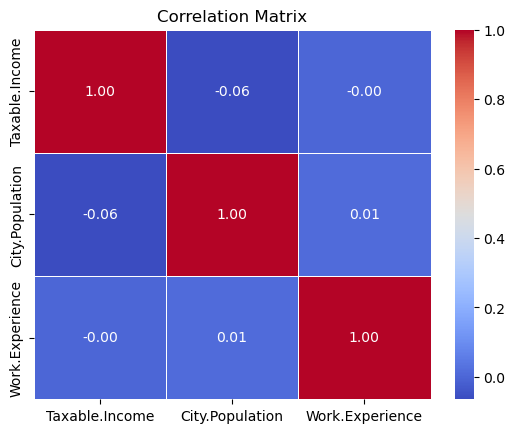

In [19]:
corr_columns = ['Taxable.Income', 'City.Population', 'Work.Experience']
new_df = df[corr_columns]
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("Correlation Matrix.png")
plt.show()

## Preparing the data for training

In [20]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Measure'],
      dtype='object')

In [21]:
df1= df[['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience','Urban', 'Measure']]

In [22]:
## Encoding Undergrad into 0 and 1
df1['Undergrad'] = df1['Undergrad'].apply(lambda x : 1 if x=='YES' else 0)
## Encoding Urban into 0 and 1
df1['Urban'] = df1['Urban'].apply(lambda x : 1 if x=='YES' else 0)
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Measure
0,0,Single,68833,50047,10,1,Good
1,1,Divorced,33700,134075,18,1,Good


In [23]:
df1 = pd.get_dummies(data = df1,  columns=['Marital.Status'])
df1

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Measure,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,Good,False,False,True
1,1,33700,134075,18,1,Good,True,False,False
2,0,36925,160205,30,1,Good,False,True,False
3,1,50190,193264,15,1,Good,False,False,True
4,0,81002,27533,28,0,Good,False,True,False
...,...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,Good,True,False,False
596,1,69967,55369,2,1,Good,True,False,False
597,0,47334,154058,0,1,Good,True,False,False
598,1,98592,180083,17,0,Good,False,True,False


## Saving the DataFrame

In [24]:
file_path = 'data/fraud_data_cleaned.csv'
df1.to_csv(file_path, index=False)